# Project 1: Aspen Morgan

In [1]:
import absorb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.constants as const

## Approximate the pressure, water vapor and temp as continous functions

In [11]:
data = pd.read_csv("standard_atmos.csv")

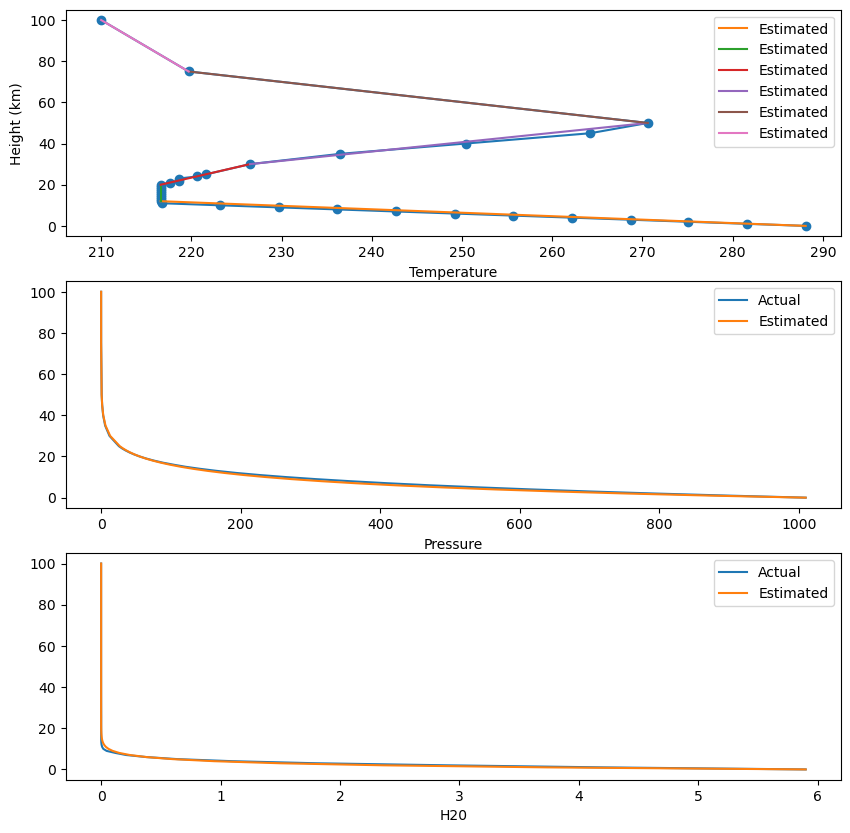

In [12]:
pres = 1010*np.exp((1/20)*np.log(55.3/1010)*data['Hgt.'])
# (pres - data['Pressure']).max()

water = 5.9*np.exp((1/6)*np.log(0.38/5.9)*data['Hgt.'])
# (water - data['H20']).max()

ints = [data['T'][0], data['T'][12]*np.ones(8), data['T'][26] - ((data['T'][26] - data['T'][20])/(data['Hgt.'][26]-data['Hgt.'][20]))*data['Hgt.'][26], data['T'][26] - ((data['T'][30] - data['T'][26])/(data['Hgt.'][30]-data['Hgt.'][26]))*data['Hgt.'][26], data['T'][31] - ((data['T'][31] - data['T'][30])/(data['Hgt.'][31]-data['Hgt.'][30]))*data['Hgt.'][31], data['T'][32] - ((data['T'][32] - data['T'][31])/(data['Hgt.'][32]-data['Hgt.'][31]))*data['Hgt.'][32]]
ms = [(data['T'][12] - data['T'][0])/(data['Hgt.'][12]-data['Hgt.'][0]), 0, ((data['T'][26] - data['T'][20])/(data['Hgt.'][26]-data['Hgt.'][20])), ((data['T'][30] - data['T'][26])/(data['Hgt.'][30]-data['Hgt.'][26])), ((data['T'][31] - data['T'][30])/(data['Hgt.'][31]-data['Hgt.'][30])), ((data['T'][32] - data['T'][31])/(data['Hgt.'][32]-data['Hgt.'][31]))]
temp1 = ints[0] + ms[0]*data['Hgt.'][0:13]
temp2 = ints[1] + ms[1]*data['Hgt.'][12:20] 
temp3 = ints[2] + ms[2]*data['Hgt.'][20:27]
temp4 = ints[3] + ms[3]*data['Hgt.'][26:31]
temp5 = ints[4] + ms[4]*data['Hgt.'][30:32]
temp6 = ints[5] + ms[5]*data['Hgt.'][31:33]

# plot variables by height
fig, ax = plt.subplots(3, 1, figsize=(10, 10), dpi=100)
ax[0].plot(data['T'], data['Hgt.'])
ax[0].scatter(data['T'], data['Hgt.'])
ax[0].plot(temp1, data['Hgt.'][0:13], label='Estimated')
ax[0].plot(temp2, data['Hgt.'][12:20], label='Estimated')
ax[0].plot(temp3, data['Hgt.'][20:27], label='Estimated')
ax[0].plot(temp4, data['Hgt.'][26:31], label='Estimated')
ax[0].plot(temp5, data['Hgt.'][30:32], label='Estimated')
ax[0].plot(temp6, data['Hgt.'][31:33], label='Estimated')
ax[0].legend()
ax[0].set_ylabel('Height (km)')
ax[0].set_xlabel('Temperature')
ax[1].plot(data['Pressure'], data['Hgt.'], label='Actual')
ax[1].plot(pres, data['Hgt.'], label='Estimated')
ax[1].legend()
ax[1].set_xlabel('Pressure')
ax[2].plot(data['H20'], data['Hgt.'], label='Actual')
ax[2].plot(water, data['Hgt.'], label='Estimated')
ax[2].legend()
ax[2].set_xlabel('H20');

In [13]:
data = pd.read_csv('standard_atmos.csv')
def get_given_pressure(z):
    return 1010*np.exp((1/20)*np.log(55.3/1010)*z)
def get_given_water(z):
    return 5.9*np.exp((1/6)*np.log(0.38/5.9)*z)
def get_given_temperature(z):
    ints = [data['T'][0], 
                data['T'][12], 
                data['T'][26] - ((data['T'][26] - data['T'][20])/(data['Hgt.'][26]-data['Hgt.'][20]))*data['Hgt.'][26], 
                data['T'][26] - ((data['T'][30] - data['T'][26])/(data['Hgt.'][30]-data['Hgt.'][26]))*data['Hgt.'][26], 
                data['T'][31] - ((data['T'][31] - data['T'][30])/(data['Hgt.'][31]-data['Hgt.'][30]))*data['Hgt.'][31], 
                data['T'][32] - ((data['T'][32] - data['T'][31])/(data['Hgt.'][32]-data['Hgt.'][31]))*data['Hgt.'][32]]
    ms = [(data['T'][12] - data['T'][0])/(data['Hgt.'][12]-data['Hgt.'][0]), 
              0, 
              ((data['T'][26] - data['T'][20])/(data['Hgt.'][26]-data['Hgt.'][20])), 
              ((data['T'][30] - data['T'][26])/(data['Hgt.'][30]-data['Hgt.'][26])), 
              ((data['T'][31] - data['T'][30])/(data['Hgt.'][31]-data['Hgt.'][30])), 
              ((data['T'][32] - data['T'][31])/(data['Hgt.'][32]-data['Hgt.'][31]))]
    if z <= 11:
        return ints[0] + ms[0]*z
    elif (z > 11) & (z <= 20):
        return ints[1] + ms[2]*z
    elif (z > 20) & (z <= 30):
        return ints[2] + ms[2]*z
    elif (z > 30) & (z <= 50):
        return ints[3] + ms[3]*z
    elif (z > 50) & (z <= 75):
        return ints[4] + ms[4]*z
    elif (z > 75) & (z <= 100):
        return ints[5] + ms[5]*z


## A. Compute the extinction coefficient as a function of freqeuncy across the spectrum

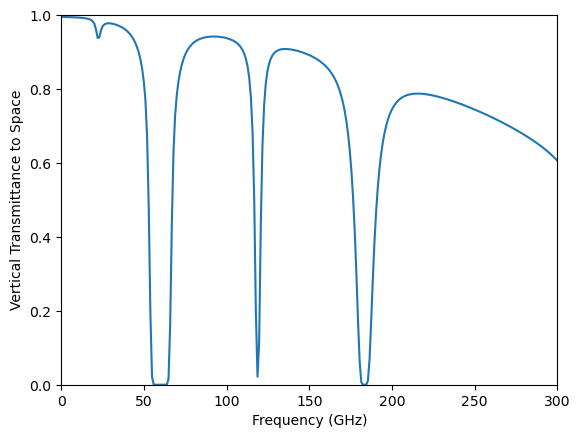

In [48]:
# need range of frequencies (in GHz)
freqs = np.linspace(1, 300, 301)

# compute ks based on frequencies
transmittance = np.zeros((len(freqs)))
k_exts = np.zeros((len(freqs)))
for i, f in enumerate(freqs):

    # get k (clw = content of liquid water)
    z0 = 0
    z1 = 10
    dz = z1 - z0
    k_exts[i] = absorb.absorb_all(freqy=f, temp=get_given_temperature(z1/2), pres=get_given_pressure(z1/2),
                              vapor_pres=get_given_water(z1/2), clw=0)
    transmittance[i] = np.exp(-k_exts[i]*dz)
    
    
fig, ax = plt.subplots(dpi=100)
ax.plot(freqs, transmittance)
ax.set_xlim(0, 300)
ax.set_ylim(0, 1)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Vertical Transmittance to Space');
# ax.set_title('Figure 1: Transmission from surface over microwave spectrum');

## B. Brightness temperature and radiance relationship

Since we are working in the microwave spectrum, we can utilize the long wavelength limit (Rayleigh-Jeans distribution) of Planks law. 

Rayleigh-Jeans in terms of wavelength: $B_\lambda=\frac{2ckTd\lambda}{\lambda^4}$ 

In terms of frequency: $B_\nu=\frac{2kT\nu^2d\nu}{c^2}$ (used $c=\nu \lambda$ and $d\lambda=c\nu^{-2}d\nu$ to convert) where T is the brightness temperature.

## C. Radiative transfer code

In [7]:
class RadiativeTransfer:
    # Initialize constants and brightness temperatures
    def __init__(self, emis_sfc=1, num_layers=1000, view_angle=0):
        self.emis_sfc = emis_sfc # emissivity at surface
        self.num_layers = num_layers # number of layers in atmosphere
        self.mu = np.abs(np.cos(np.radians(view_angle))) # cosine of view angle in degrees
        self.k = const.Boltzmann 
        self.c = const.speed_of_light
        self.Fs = np.linspace(1, 300, 301)*(10**9) # Hz

        # set up layer heights
        self.zs = np.concatenate([np.logspace(0, 2, self.num_layers - 1) - 1, [100]])
        self.given_Ts = np.zeros(num_layers) # empty array to hold given temperatures

        # get k_abs by frequency and layer
        self.k_abs = np.zeros((num_layers, len(self.Fs))) # empty array to hold k_abs values
        for i, z in enumerate(self.zs):
            # get temp, pressure, and vapor pressure
            temperature = get_given_temperature(z)
            self.given_Ts[i] = temperature # save given temperature for each layer
            pressure = get_given_pressure(z)
            vapor_pressure = get_given_water(z)
            for j, f in enumerate(self.Fs):
                self.k_abs[i][j] = absorb.absorb_all(freqy=f*(10**-9), temp=temperature, pres=pressure,
                                                  vapor_pres=vapor_pressure, clw=0)

    def run_sim(self):
        # DOWNWELLING------------------------------------------
        # TERM A: emission at TOA extinguished to surface
        top_layer_ems = 1 - np.exp(-self.k_abs[-1]*(self.zs[-1]-self.zs[-2])/self.mu) # 1 - transmittance
        tau_sfc_toa = 0 
        for i in range(1, self.num_layers):
            tau_sfc_toa += self.k_abs[i] * (self.zs[i] - self.zs[i-1])
        termA = top_layer_ems * self.get_Bs(self.given_Ts[-1], self.Fs) * np.exp(-tau_sfc_toa/self.mu) 

        # TERM B: emission at each layer extinguished to surface
        termB = 0
        for i in range(self.num_layers-1, 0, -1):
            tau_layer_sfc = 0
            for j in range(i, 0, -1):
                tau_layer_sfc += self.k_abs[j] * (self.zs[j] - self.zs[j-1])
            dz = self.zs[i] - self.zs[i-1]
            layer_ems = 1 - np.exp(-self.k_abs[i]*dz/self.mu) # 1 - transmittance
            termB += layer_ems * self.get_Bs(self.given_Ts[i], self.Fs) * np.exp(-tau_layer_sfc/self.mu) # * self.k_abs[i] * dz
        # termB /= self.mu
        
        # put it together and get brightness temperature at surface
        I_sfc = termA + termB
        Tb_sfc = self.get_Ts(I_sfc, self.Fs)

        # UPWELLING--------------------------------------------
        # TERM 1: emission at surface extinguished to TOA
        # reflectance
        reflect = I_sfc * (1 - self.emis_sfc)
        term1 =  (reflect + self.emis_sfc * self.get_Bs(self.given_Ts[0], self.Fs)) * np.exp(-tau_sfc_toa/self.mu) 

        # TERM 2: emission at each layer extinguished to TOA
        term2 = 0
        for i in range(1, self.num_layers):
            tau_layer_toa = 0
            for j in range(i+1, self.num_layers):
                tau_layer_toa += self.k_abs[j] * (self.zs[j] - self.zs[j-1])
            dz = self.zs[i] - self.zs[i-1]
            layer_ems = 1 - np.exp(-self.k_abs[i]*dz/self.mu) # 1 - transmittance
            term2 += layer_ems * self.get_Bs(self.given_Ts[i], self.Fs) * np.exp(-tau_layer_toa/self.mu) # * self.k_abs[i] * dz
        # term2 /= self.mu
        
        # put it together and get brightness temperature at TOA
        I_toa = term1 + term2
        Tb_toa = self.get_Ts(I_toa, self.Fs)

        return Tb_sfc, Tb_toa

    def get_Bs(self, T, freqs):
        return 2*self.k*T*(freqs**2)/(self.c**2)
    
    def get_Ts(self, B, freqs):
        return (B*(self.c**2))/(2*self.k*(freqs**2))

In [8]:
nadar = RadiativeTransfer(emis_sfc=1, view_angle=0)
Tb_sfc, Tb_toa = nadar.run_sim()

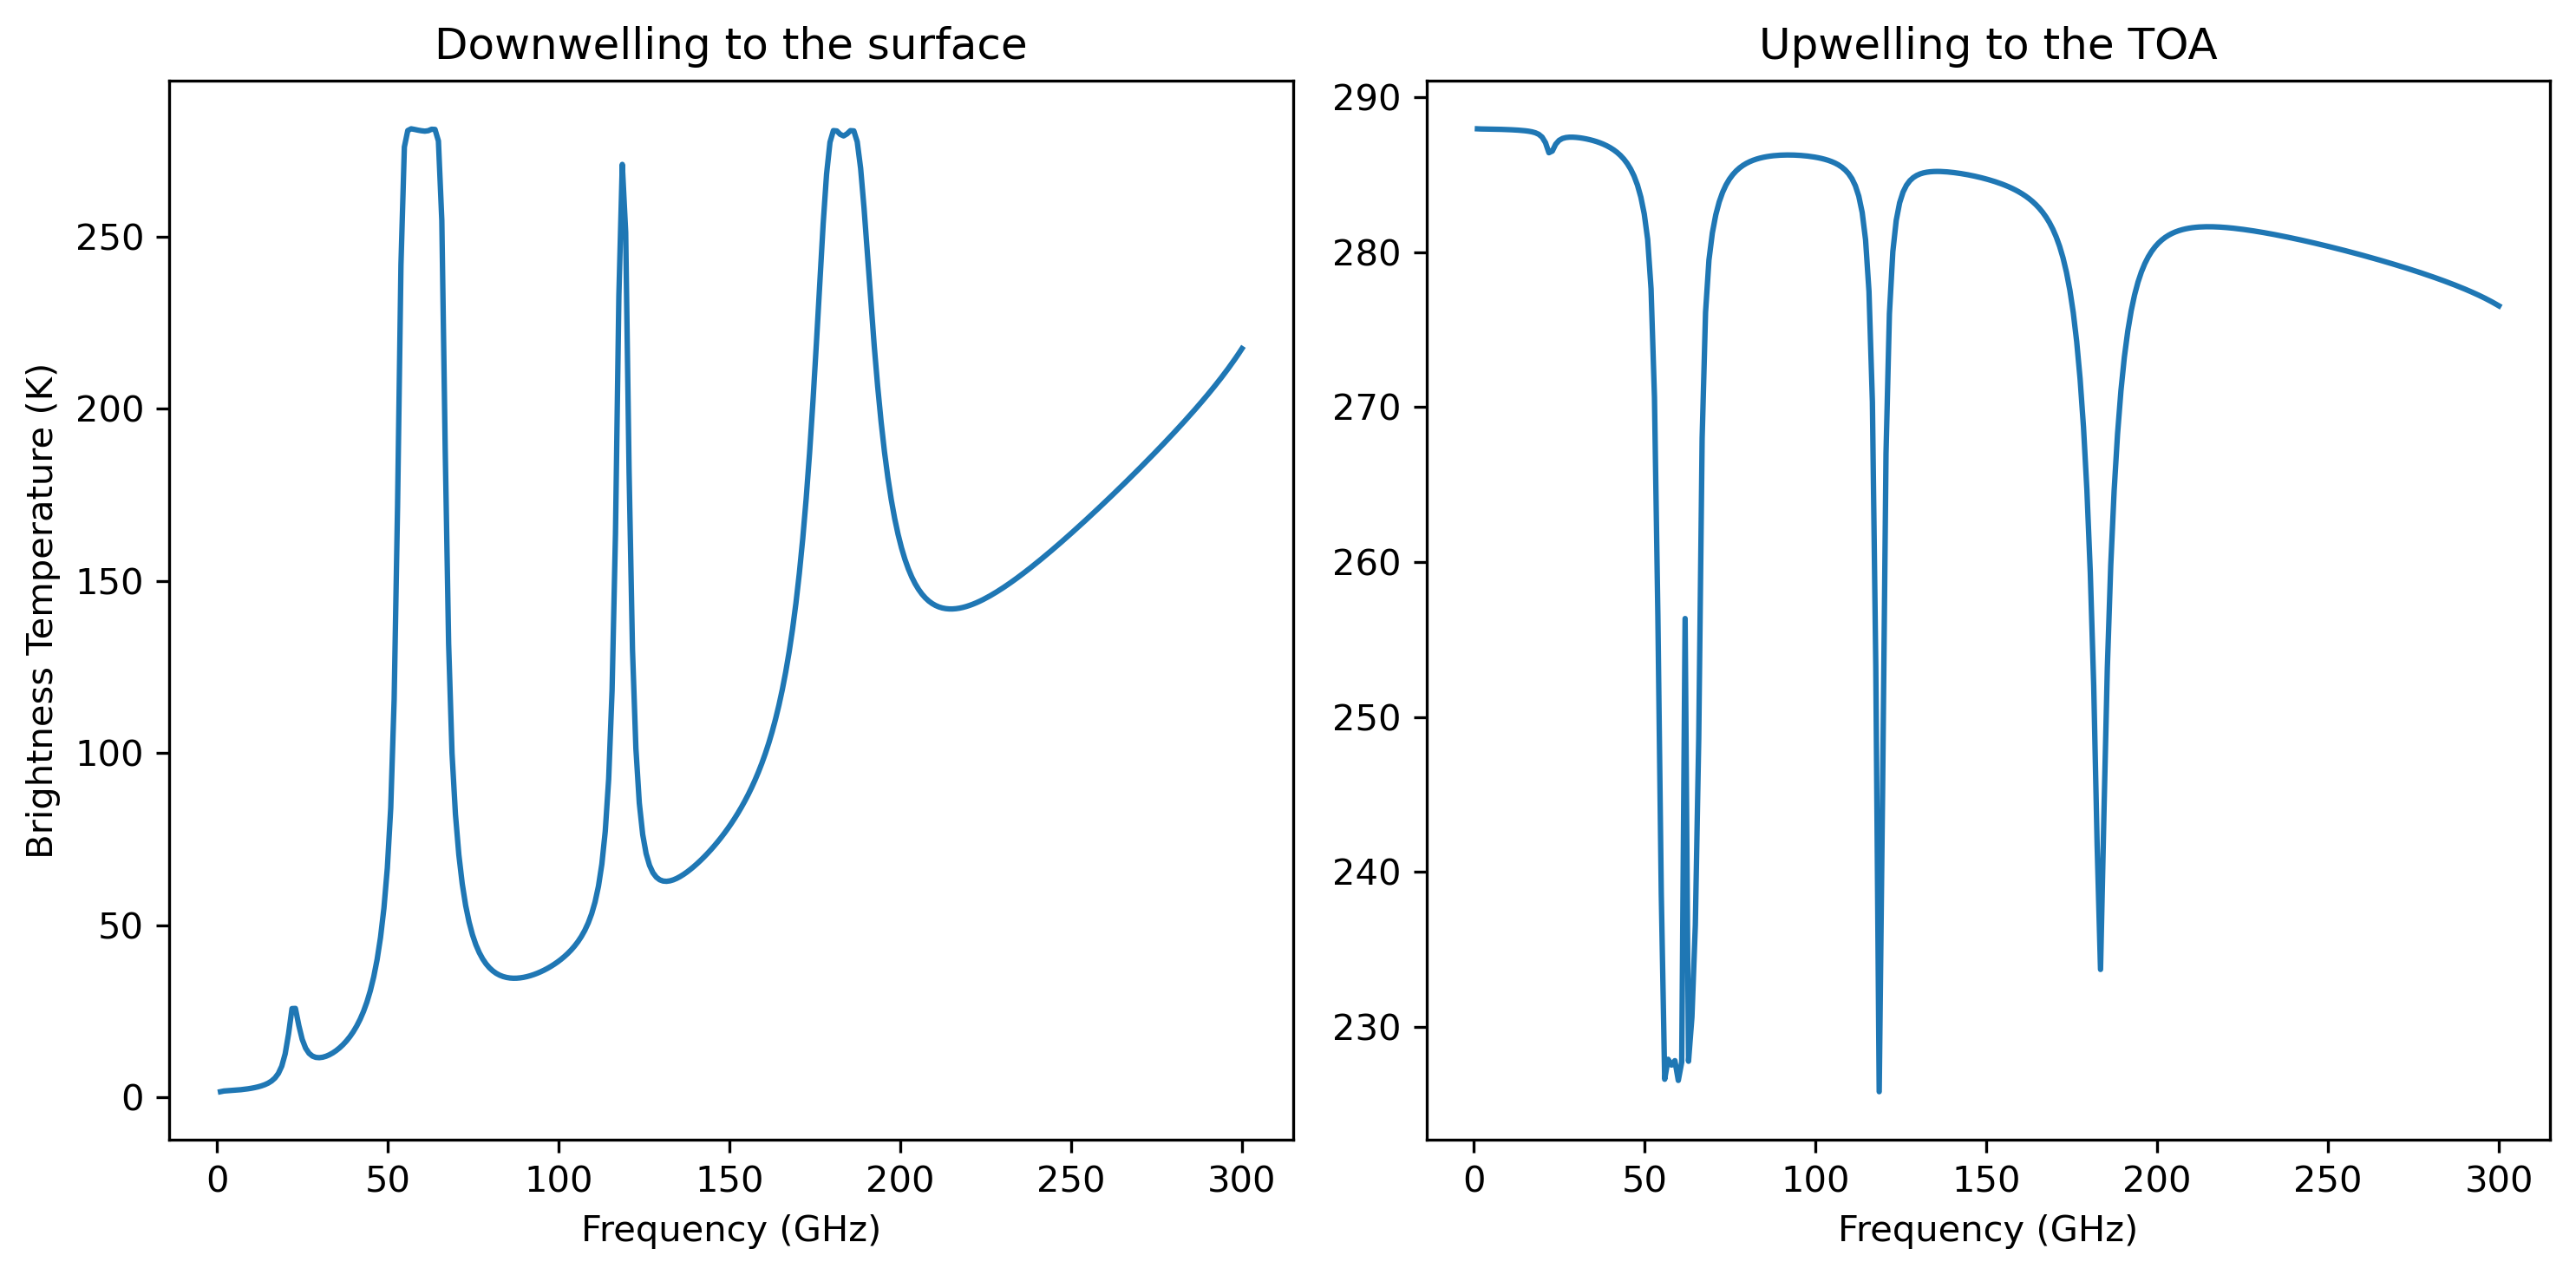

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=300)
ax[0].plot(nadar.Fs/1e9, Tb_sfc)
ax[0].set_xlabel('Frequency (GHz)')
ax[0].set_ylabel('Brightness Temperature (K)')
ax[0].set_title('Downwelling to the surface')
ax[1].plot(nadar.Fs/1e9, Tb_toa)
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_title('Upwelling to the TOA')
# fig.suptitle('Brightness Temperature vs Frequency (0$^\circ$ view angle)', fontsize=14)
plt.tight_layout();

In [10]:
Tb_sfc[182], Tb_toa[182]

(279.6507978424705, 241.80300866890315)

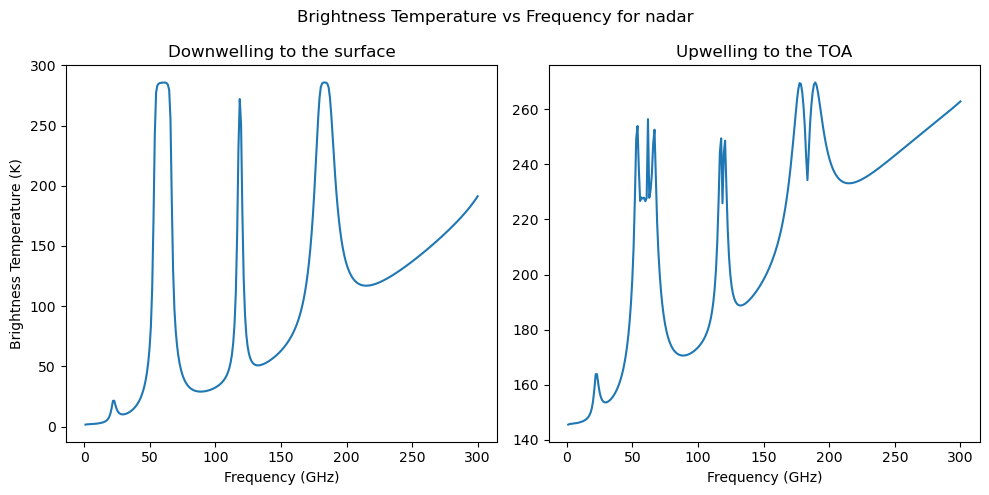

In [384]:
nadar2 = RadiativeTransfer(num_layers=10_000, emis_sfc=0.5, view_angle=0)
Tb_sfc2, Tb_toa2 = nadar2.run_sim()

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
ax[0].plot(nadar.Fs/1e9, Tb_sfc2)
ax[0].set_xlabel('Frequency (GHz)')
ax[0].set_ylabel('Brightness Temperature (K)')
ax[0].set_title('Downwelling to the surface')
ax[1].plot(nadar.Fs/1e9, Tb_toa2)
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_title('Upwelling to the TOA')
fig.suptitle('Brightness Temperature vs Frequency for nadar')
plt.tight_layout();

In [ ]:
Tb_sfc2[182], Tb_toa2[182]

(285.8635605992039, 234.24913924306938)

## D. Testing 

In [33]:
# compare with library
from pyrtlib.absorption_model import O2AbsModel
from pyrtlib.climatology import AtmosphericProfiles as atmp
from pyrtlib.tb_spectrum import TbCloudRTE
from pyrtlib.utils import ppmv2gkg, mr2rh

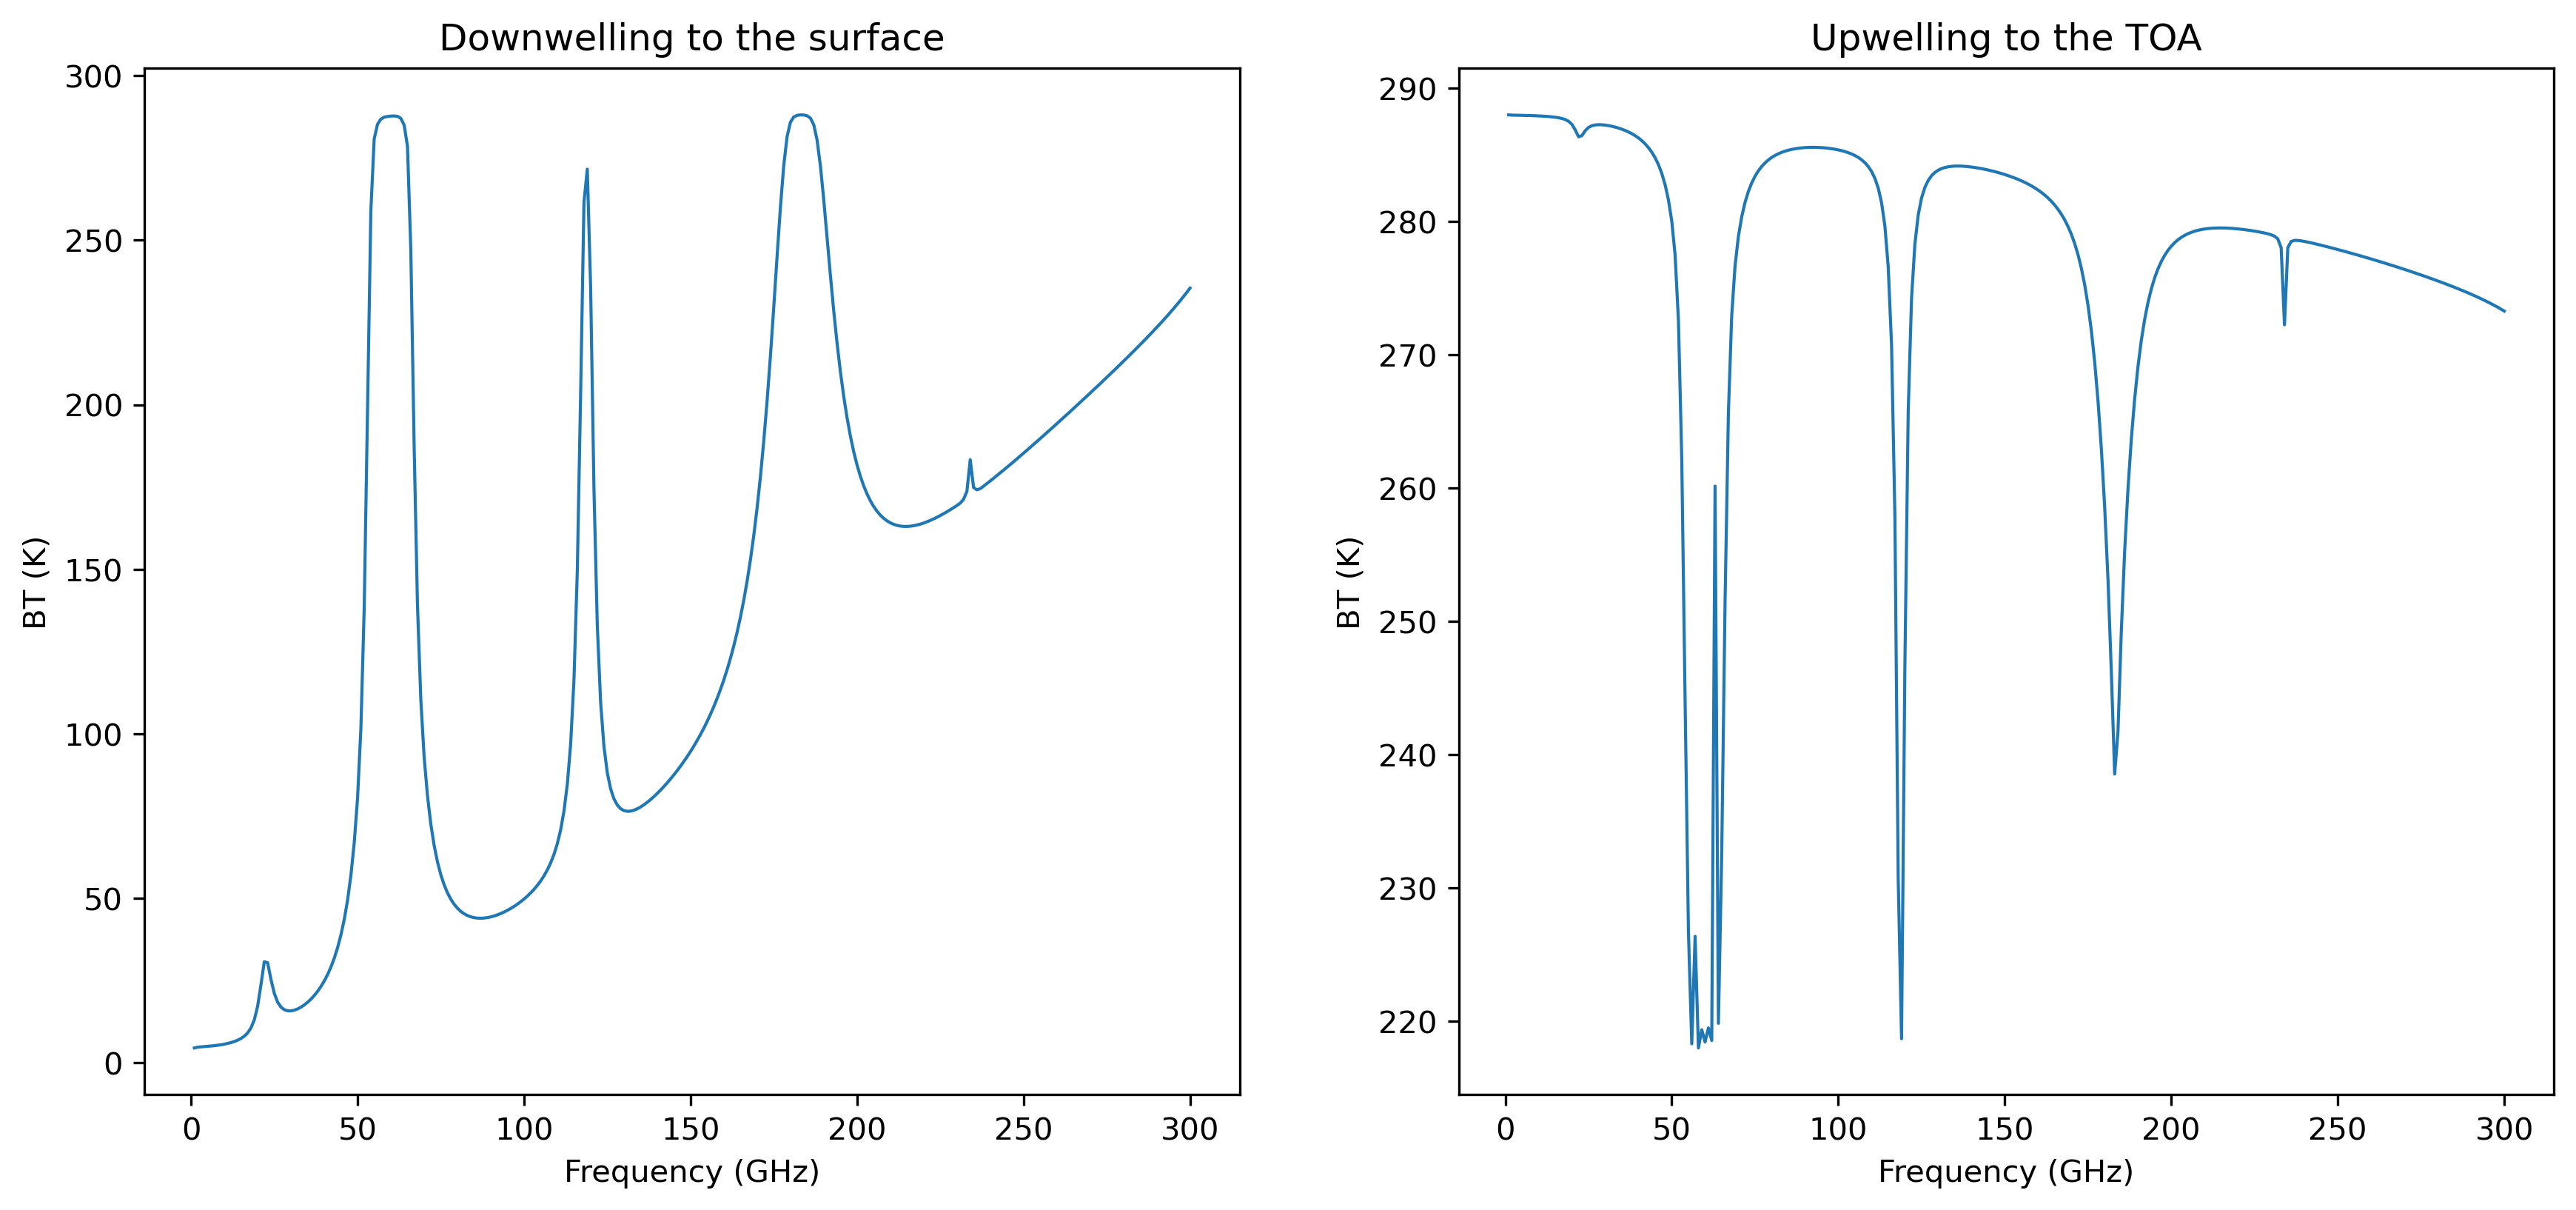

In [42]:
# upwelling
atm = ['Tropical',
       'Midlatitude Summer',
       'Midlatitude Winter',
       'Subarctic Summer',
       'Subarctic Winter',
       'U.S. Standard']

fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

for i in range(5, 6):
    z, p, d, t, md = atmp.gl_atm(i)
    gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
    rh = mr2rh(p, t, gkg)[0] / 100

    mdl = 'R17'

    ang = np.array([90.])
    frq = np.arange(1, 301, 1)
    nf = len(frq)

    ax[0].set_xlabel('Frequency (GHz)')
    ax[0].set_ylabel('BT (K)')

    rte = TbCloudRTE(z, p, t, rh, frq, ang)
    rte.satellite = False
    rte.init_absmdl(mdl)
    df = rte.execute()

    df = df.set_index(frq)
    df.tbtotal.plot(ax=ax[0], linewidth=1, label='{}'.format(atm[i]))
    ax[0].set_title('Downwelling to the surface')

for i in range(5, 6):
    z, p, d, t, md = atmp.gl_atm(i)
    gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
    rh = mr2rh(p, t, gkg)[0] / 100

    mdl = 'R19SD'

    ang = np.array([90.])
    frq = np.arange(1, 301, 1)
    nf = len(frq)

    ax[1].set_xlabel('Frequency (GHz)')
    ax[1].set_ylabel('BT (K)')

    rte = TbCloudRTE(z, p, t, rh, frq, ang)
    rte.init_absmdl(mdl)
    df = rte.execute()

    df = df.set_index(frq)
    df.tbtotal.plot(ax=ax[1], linewidth=1, label='{}'.format(atm[i]))
    ax[1].set_title('Upwelling to the TOA')

# fig.suptitle('Pyrtlib US Standard Atmosphere')
plt.show()

In [ ]:
import pytest
# to test if my downwelling and upwelling is correct
def test_radiative_transfer():
    """
    Test the RadiativeTransfer class.
    """
    # Create an instance of the RadiativeTransfer class
    rt = RadiativeTransfer(emis_sfc=0.5, num_layers=1000, view_angle=0)

    # Run the simulation
    Tb_sfc, Tb_toa = rt.run_sim()

    # Check that the output values are within expected ranges
    assert Tb_sfc[182] == pytest.approx(240, rel=10)
    assert Tb_toa[182] == pytest.approx(288.1, rel=10)

    # Check that the brightness temperatures are within a reasonable range
    assert np.all(Tb_sfc > 0)
    assert np.all(Tb_toa > 0)

    # check that the functions are increasing with frequency
    # assert np.all(np.diff(Tb_sfc) > 0)
    # assert np.all(np.diff(Tb_toa) > 0)

# run the test
test_radiative_transfer()

## E. Downwelling and upwelling brigtness T's at 183 GHz water vapor absorption line

In [44]:
fiftythreedeg = RadiativeTransfer(emis_sfc=0.5, view_angle=53)
Tb_sfc3, Tb_toa3 = fiftythreedeg.run_sim()

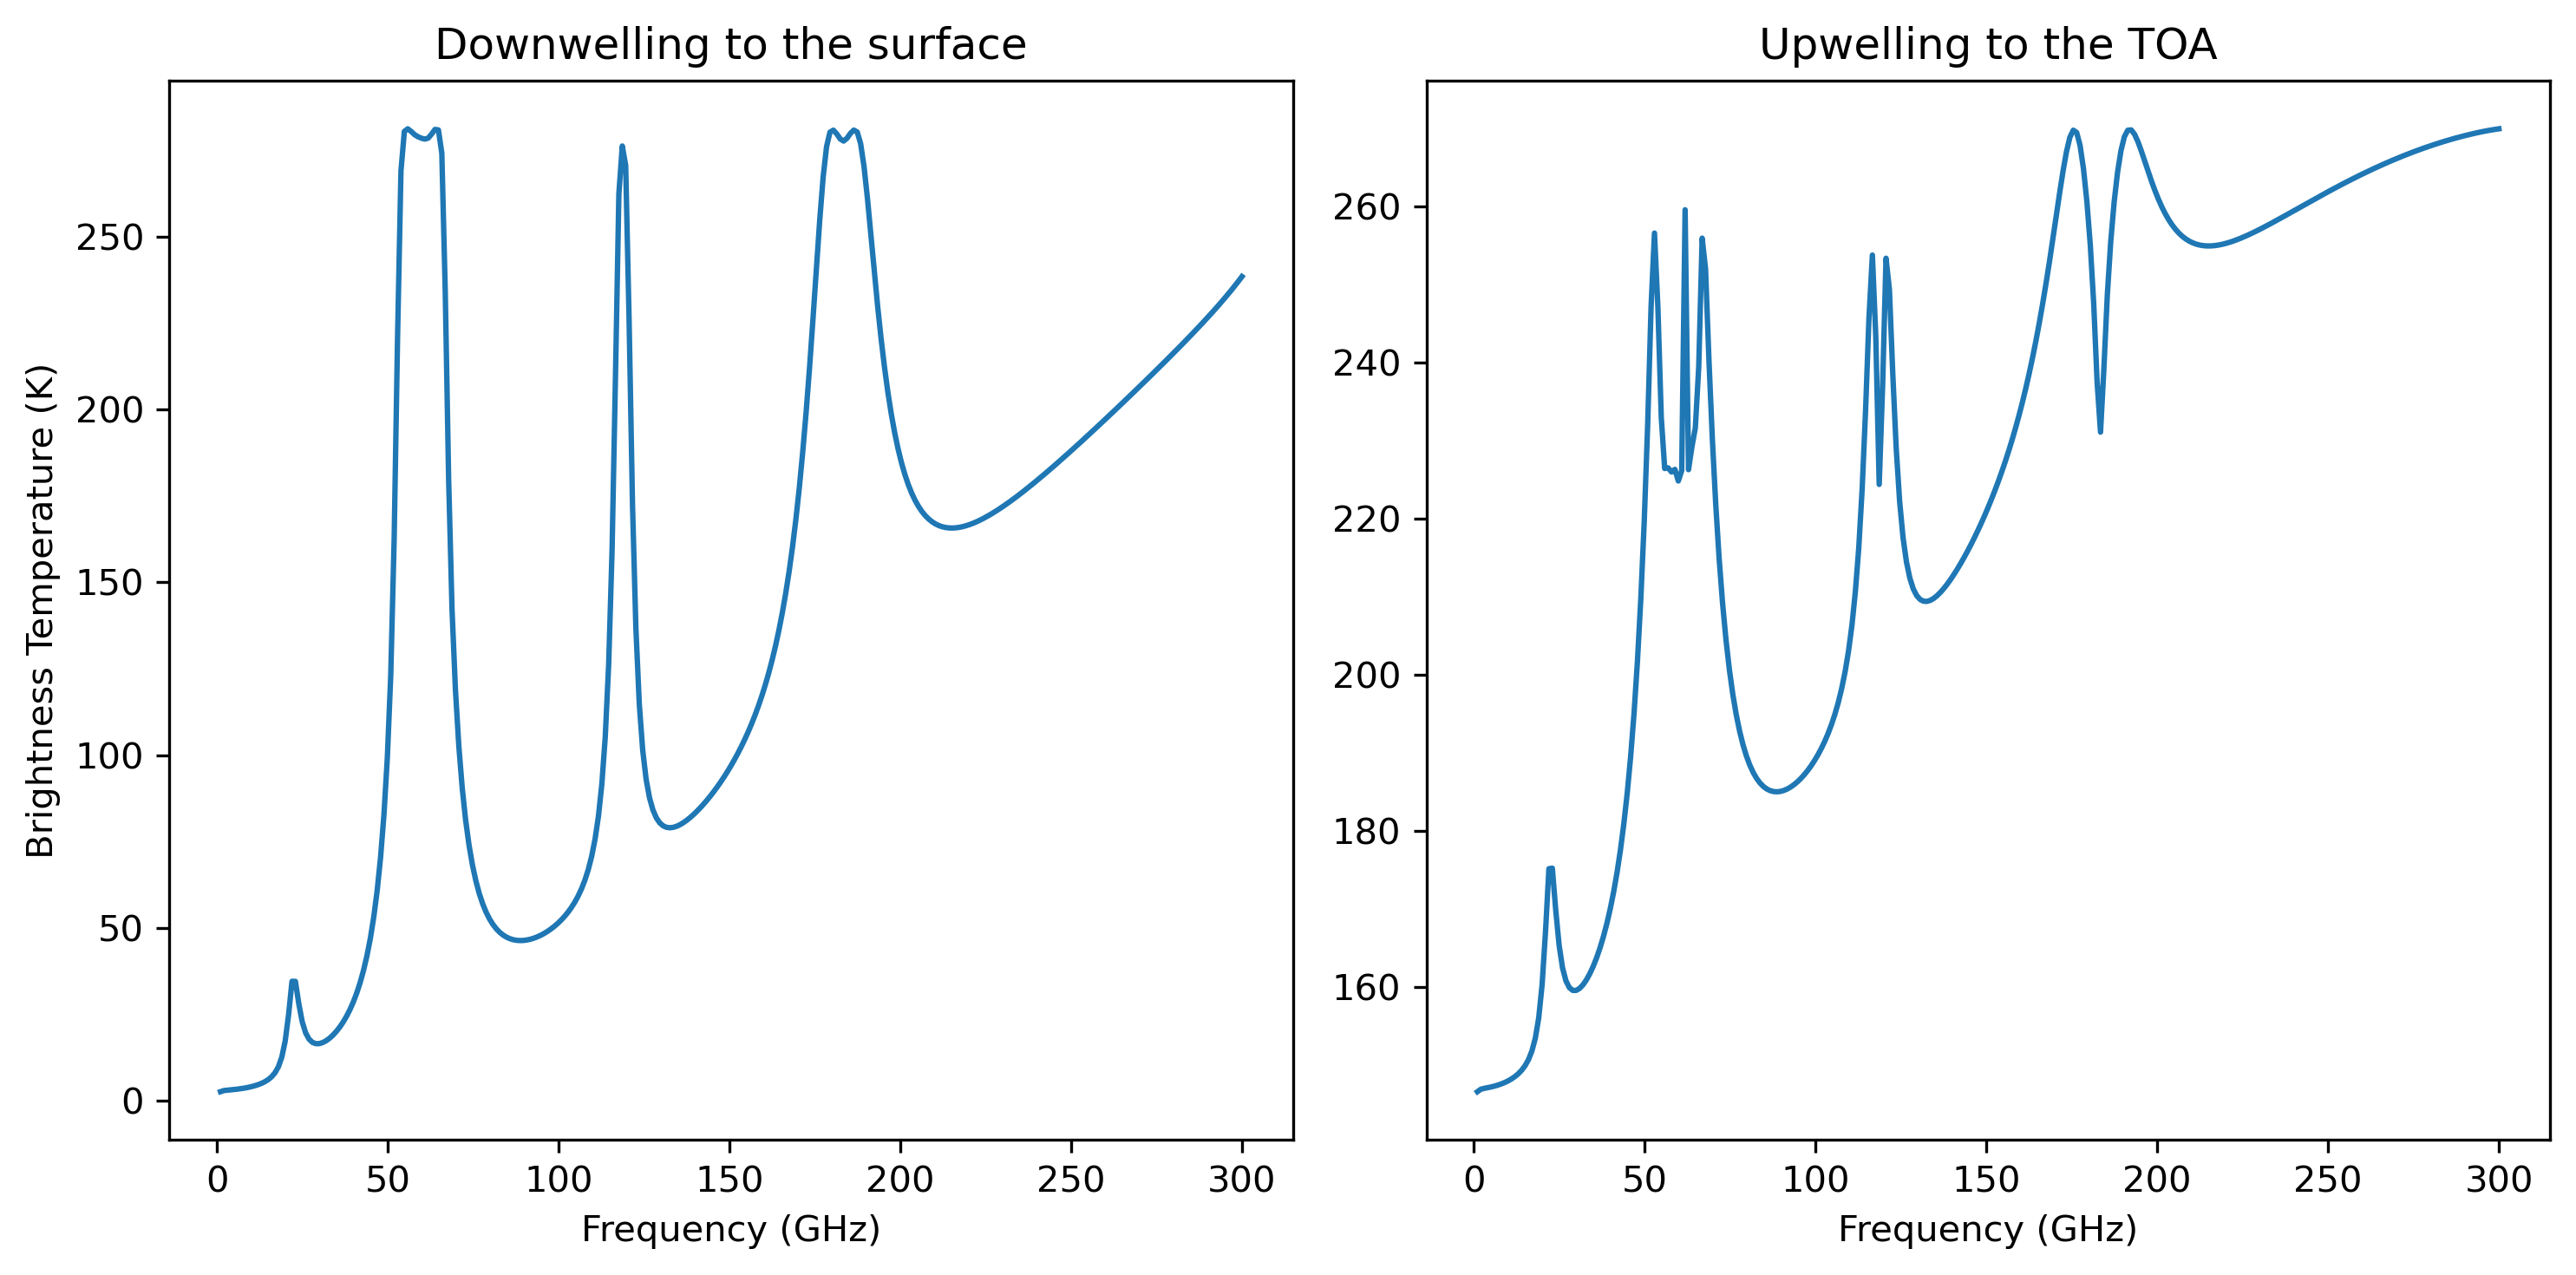

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=300)
ax[0].plot(fiftythreedeg.Fs/1e9, Tb_sfc3)
ax[0].set_xlabel('Frequency (GHz)')
ax[0].set_ylabel('Brightness Temperature (K)')
ax[0].set_title('Downwelling to the surface')
ax[1].plot(fiftythreedeg.Fs/1e9, Tb_toa3)
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_title('Upwelling to the TOA')
# fig.suptitle('Brightness Temperature vs Frequency for nadar')
plt.tight_layout();

In [17]:
Tb_sfc3[182], Tb_toa3[182]

(278.30681064398937, 237.5134875723067)

## F. Relationship between water vapor and brightness temperature

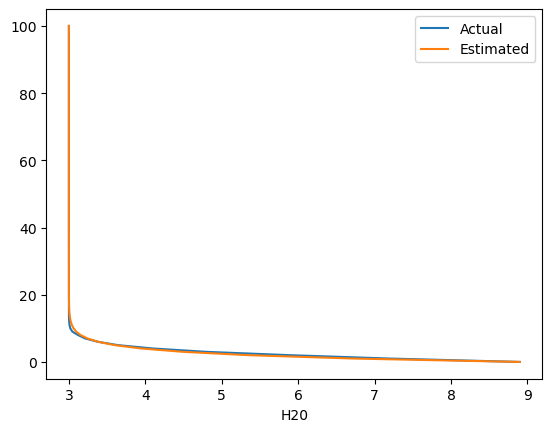

In [409]:
# add 3 to every value of water vapor
data2 = pd.read_csv('standard_atmos.csv')
data2['H20'] = data2['H20'] + 3
water = 5.9*np.exp((1/6)*np.log(0.38/5.9)*(data2['Hgt.']))+3

fig, ax = plt.subplots(dpi=100)
ax.plot(data2['H20'], data2['Hgt.'], label='Actual')
ax.plot(water, data2['Hgt.'], label='Estimated')
ax.legend()
ax.set_xlabel('H20');

In [411]:
def get_given_water(z):
    return 5.9*np.exp((1/6)*np.log(0.38/5.9)*z)+3

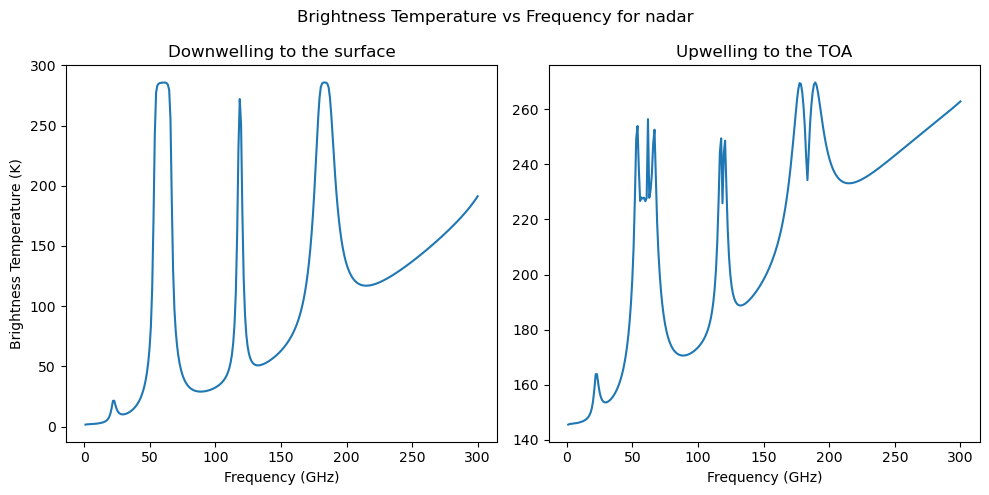

In [413]:
nadar5 = RadiativeTransfer(num_layers=1000, emis_sfc=0.5, view_angle=0)
Tb_sfc5, Tb_toa5 = nadar5.run_sim()

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
ax[0].plot(nadar.Fs/1e9, Tb_sfc2)
ax[0].set_xlabel('Frequency (GHz)')
ax[0].set_ylabel('Brightness Temperature (K)')
ax[0].set_title('Downwelling to the surface')
ax[1].plot(nadar.Fs/1e9, Tb_toa2)
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_title('Upwelling to the TOA')
fig.suptitle('Brightness Temperature vs Frequency for nadar')
plt.tight_layout();